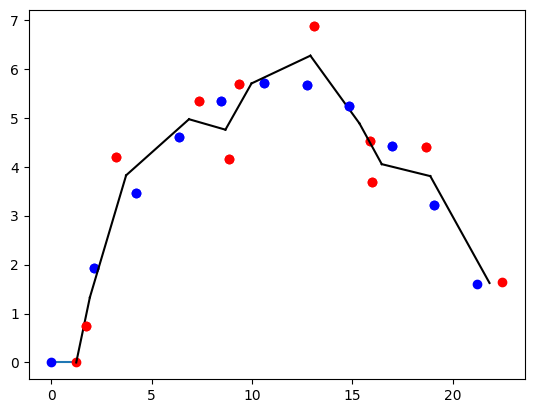

In [1]:
import numpy as np 
import math 
import matplotlib.pyplot as plt

class Path:
    def __init__(self, v0, theta):
        self.g = 9.8
        self.v0 = v0
        self.theta = theta
        self.vox = self.v0 * math.cos(self.theta * math.pi / 180.0)
        self.voy = self.v0 * math.sin(self.theta * math.pi / 180.0)

    def getX(self, t):
        self.t = t
        return self.vox * self.t

    def getY(self, t):
        self.t = t
        return self.voy * self.t - 0.5 * self.g * t**2


class Ball:
    def __init__(self, mass, radius):
        self.m = mass
        self.r = radius

    def getM(self):
        return self.m

    def getR(self):
        return self.r

    def getI1(self):
        return (2.0/5.0) * self.m * (self.r)**2


class Baton(Ball, Path):
    def __init__(self, mass, radius, v0, theta, L1, w1):
        Ball.__init__(self, mass, radius)
        Path.__init__(self, v0, theta)
        self.L = L1
        self.w = w1

    def getM(self):
        return 2.0 * self.getM1()

    def getI(self):
        return self.getI1() + 0.5 * self.L**2 * self.getM() * self.L**2

    def getXa(self, t):
        xa = self.getX(t) + 0.5 * self.L * math.cos(self.w * t)
        return xa

    def getYa(self, t):
        return self.getY(t) + 0.5 * self.L * math.sin(self.w * t)

    def getXb(self, t):
        return self.getXa(t) - 0.5 * self.L * math.cos(self.w * t)

    def getYb(self, t):
        return self.getYa(t) - 0.5 * self.L * math.sin(self.w * t)

    def position(self):
        t = 0.0
        count = 4
        xa0 = self.getXa(t)
        ya0 = self.getYa(t)
        xb0 = self.getXb(t)
        yb0 = self.getYb(t)
        xco = xa0
        yco = ya0

        plt.plot([xa0, xb0], [ya0, yb0], '-')


        t += 0.2
        while self.getYa(t) >= 0:
            xa = self.getXa(t)
            ya = self.getYa(t)
            xb = self.getXb(t)
            yb = self.getYb(t)

            count += 1
            xc = (xa + xb) / 2
            yc = (ya + yb) / 2

            plt.plot([xa0, xa], [ya0, ya], 'or')
            plt.plot([xb0, xb], [yb0, yb], 'ob')
            plt.plot([xco, xc], [yco, yc], 'k')
            plt.draw()

            xa0 = xa
            ya0 = ya
            xb0 = xb
            yb0 = yb
            xco = xc
            yco = yc

            t += 0.2

       
mybaton = Baton (0.5, 0.4, 15.0, 45.0, 2.5, 22.0)

mybaton.position()


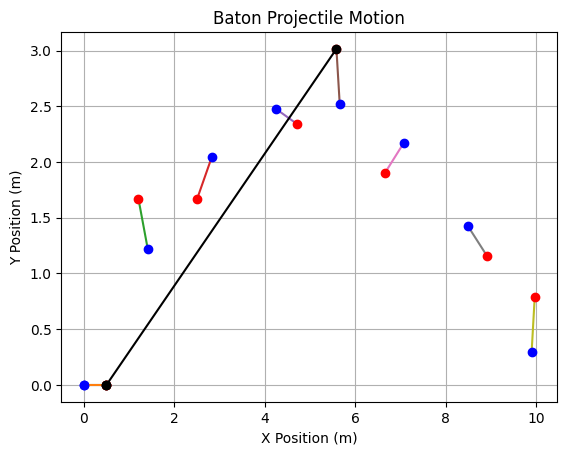

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Path:
    def __init__(self, v0, theta):
        self.g = 9.8
        self.v0 = v0
        self.theta = theta
        self.vox = self.v0 * math.cos(self.theta * math.pi / 180.0)
        self.voy = self.v0 * math.sin(self.theta * math.pi / 180.0)

    def getX(self, t):
        return self.vox * t

    def getY(self, t):
        return self.voy * t - 0.5 * self.g * t**2

class Ball:
    def __init__(self, mass, radius):
        self.m = mass
        self.r = radius

    def getM(self):
        return self.m

    def getR(self):
        return self.r

    def getI1(self):
        return (2.0/5.0) * self.m * (self.r)**2

class Baton(Ball, Path):
    def __init__(self, mass, radius, v0, theta, L1, w1):
        Ball.__init__(self, mass, radius)
        Path.__init__(self, v0, theta)
        self.L = L1
        self.w = w1

    def getM(self):
        return 2.0 * self.getM1()

    def getI(self):
        return self.getI1() + 0.5 * self.L**2 * self.getM() * self.L**2

    def getXa(self, t):
        xa = self.getX(t) + 0.5 * self.L * math.cos(self.w * t)
        return xa

    def getYa(self, t):
        return self.getY(t) + 0.5 * self.L * math.sin(self.w * t)

    def getXb(self, t):
        return self.getXa(t) - 0.5 * self.L * math.cos(self.w * t)

    def getYb(self, t):
        return self.getYa(t) - 0.5 * self.L * math.sin(self.w * t)

    def position(self):
        t = 0.0
        count = 4
        xa0 = self.getXa(t)
        ya0 = self.getYa(t)
        xb0 = self.getXb(t)
        yb0 = self.getYb(t)
        xco = xa0
        yco = ya0

        plt.plot([xa0, xb0], [ya0, yb0], '-')
        plt.plot(xa0, ya0, 'ro')  # Mark initial position A
        plt.plot(xb0, yb0, 'bo')  # Mark initial position B

        while self.getYa(t) >= 0:
            xa = self.getXa(t)
            ya = self.getYa(t)
            xb = self.getXb(t)
            yb = self.getYb(t)
            plt.plot([xa, xb], [ya, yb], '-')
            plt.plot(xa, ya, 'ro')
            plt.plot(xb, yb, 'bo')

            if count % 4 == 0:
                xco = np.append(xco, xa)
                yco = np.append(yco, ya)

            t += 0.2
            count += 1

        plt.plot(xco, yco, 'ko-')  # Plot the trajectory around COM
        plt.grid(True)
        plt.xlabel("X Position (m)")
        plt.ylabel("Y Position (m)")
        plt.title("Baton Projectile Motion")
        plt.show()

# Create a Baton object with mass=0.5 kg, radius=0.05 m,
# initial velocity=10 m/s at an angle of 45 degrees,
# length of baton L1=1 m, and angular velocity w1=10 rad/s
baton = Baton(0.5, 0.05, 10, 45, 1, 10)

# Plot the position of the baton over time
baton.position()


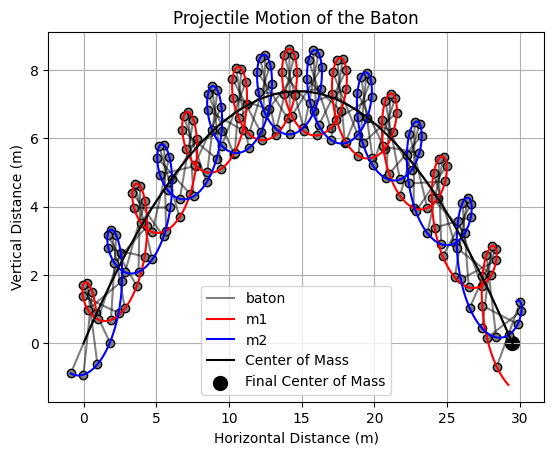

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Path:
    def __init__(self, v0, theta):
        self.g = 9.8
        self.v0 = v0
        self.theta = theta
        self.vox = self.v0 * math.cos(self.theta * math.pi / 180.0)
        self.voy = self.v0 * math.sin(self.theta * math.pi / 180.0)

    def getX(self, t):
        return self.vox * t

    def getY(self, t):
        return self.voy * t - 0.5 * self.g * t**2

class Ball:
    def __init__(self, mass, radius):
        self.m = mass
        self.r = radius

    def getM(self):
        return self.m

    def getR(self):
        return self.r

    def getI1(self):
        return (2.0/5.0) * self.m * (self.r)**2

class Baton(Ball, Path):
    def __init__(self, mass, radius, v0, theta, L1, w1):
        Ball.__init__(self, mass, radius)
        Path.__init__(self, v0, theta)
        self.L = L1
        self.w = w1

    def getM1(self):
        return self.m

    def getM(self):
        return 2.0 * self.getM1()

    def getI(self):
        return self.getI1() + 0.5 * self.L**2 * self.getM() * self.L**2

    def getXa(self, t):
        return self.getX(t) + 0.5 * self.L * np.cos(self.w * t + self.theta * math.pi / 180.0)

    def getYa(self, t):
        return self.getY(t) + 0.5 * self.L * np.sin(self.w * t + self.theta * math.pi / 180.0)

    def getXb(self, t):
        return self.getX(t) - 0.5 * self.L * np.cos(self.w * t + self.theta * math.pi / 180.0)

    def getYb(self, t):
        return self.getY(t) - 0.5 * self.L * np.sin(self.w * t + self.theta * math.pi / 180.0)

    def position(self):
        t = np.linspace(0, 2 * self.voy / self.g, 1000)
        xa = self.getXa(t)
        ya = self.getYa(t)
        xb = self.getXb(t)
        yb = self.getYb(t)
        xc = (xa + xb) / 2
        yc = (ya + yb) / 2

        # Connect the masses at specific time intervals
        interval = 10  #  connection frequency
        first_label = True  

        for i in range(0, len(t), interval):
            if first_label:
                plt.plot([xa[i], xb[i]], [ya[i], yb[i]], 'k-', label='baton', alpha=0.5)
                first_label = False 
                plt.plot(xa[i], ya[i], 'ko', markerfacecolor='grey')       # add label for the first time
                plt.plot(xb[i], yb[i], 'ko', markerfacecolor='grey')  


            else:
                plt.plot([xa[i], xb[i]], [ya[i], yb[i]], 'k-', alpha=0.5)  # without adding label in the next iterations
                plt.plot(xa[i], ya[i], 'ko', markerfacecolor='grey') 
                plt.plot(xb[i], yb[i], 'ko', markerfacecolor='grey')  

        plt.plot(xa, ya, 'r-', label='m1')  
        plt.plot(xb, yb, 'b-', label='m2')  

        plt.plot(xc, yc, 'k-', label='Center of Mass')  
        plt.scatter(xc[-1], yc[-1], color='k', marker='o', s=100, label='Final Center of Mass')
        
        plt.xlabel('Horizontal Distance (m)')
        plt.ylabel('Vertical Distance (m)')

        plt.title('Projectile Motion of the Baton')
        plt.legend()
        plt.grid(True)
        plt.show()

       

mybaton = Baton(mass=0.5, radius=0.4, v0=17.0, theta=45.0, L1=2.5, w1=22.0)
mybaton.position()

